# Tracking the Oscillations of the Santa Cruz Coast
##### 1) Download this data set Links to an external site. that lists some tidal measurements Santa Cruz in January and February 2022. In your Jupyter notebook, define an oscillatory function in Python to describe the intra- and inter-day variations in the tide.

##### 2) Using the scipy library, fit the oscillatory function to the data assuming the root mean squared experimental error on the height of the tide is 0.25 ft. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Label the data, provide sufficient labeling of the axes to provide clarity, and have the notebook save the figure to a PDF.

##### 3) Next, have your notebook subtract off the best fit function from the data and plot the residuals. Assess graphically and mathematically deviations of the measured tidal data from the model. Plot a histogram of the residuals and measure the standard deviation. Is the scatter in the data larger than the assumed experimental error? Estimate the intrinsic scatter in the data after accounting for the assumed measurement error. Save the histogram as a PDF using our histogram best practices, including labeling of the data, axis labels, and "reasonable" bin widths as demonstrated in class.

##### 4) During the first high-tide of January 14, the tsunami from the underwater eruption of the Hunga Tonga-Hunga Ha'apai volcano reached the shores of Santa Cruz. The tsunami increased water levels near high tide by about 2ft. How large of a deviation is this tsunami, in terms of standard deviations of the distribution of normal tides from the model? Add a single 2ft outlier to the histogram of data and replot it as part of your Jupyter notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import ascii

In [2]:
def ReadFile():

    # Read and import all the data to 'tide_data'
    tide_data = ascii.read('ASTR19_F25_group_project_data.txt')
    # Print Out all info in the columns
    #print(tide_data)
    # Print out a one data point from a specific column and row: [col][row]
    #print(tide_data['col2'][2],tide_data['col1'][3])
    return tide_data

In [3]:
def DayTimeConverter(day_str,time_str):

    # Reference date for use in setting up the proper fractions for plotting
    #ref_date = "2025-01-01"
    # Create Reference time
    #ref_time = Time(ref_date)

    day = int(day_str)                             # Save the Day number as an int
    hours, minutes = map(int, time_str.split(':')) # Takes the given 00:00 time and splits it into the ints 00 & 00 for hours and minutes
    total_days = day + hours/24 + minutes/(24*60)  # Calculate the fractional time. Basically: 1d 12hr 13min --> 1.509d

    # Return astropy Time Object
    return (total_days*u.day)                

In [4]:
def FtoMeters(height_str):
    
    # Convert the stinky feet, to the real measurement system. Then, save the values in the heights array
    return (0.3048*float(height_str))        

In [5]:
def Plot(tide_data):
    
    # Create the figure
    plt.figure(facecolor='lightgrey',figsize=(20,5))
    # Set the facecolor for the figure
    ax = plt.subplot()
    ax.set_facecolor('black')
    
    # Iterate through every row, one by one
    for i in range(len(tide_data)):
        time = DayTimeConverter(tide_data['col1'][i],tide_data['col2'][i]) # Grab a date & time from a specific row
        height = FtoMeters(tide_data['col3'][i])                           # Grab a height from a specific row
        #plot_time = time.datetime                                         # Convert the Time to useful numbers
        #plt.plot(plot_time,height, 'o', color='red')                      # Plot using the time and height
        plt.plot(time,height, 'o', color='blue')                           # Plot using the time and height

    # Label the Axes
    plt.xlabel('Days')
    plt.ylabel('Height (Meters)')
    # Save the figure
    plt.savefig('surfs_up.png',bbox_inches='tight',dpi=800)

In [6]:
def main():                        
    # Print Out File Contents and save them to tide_data
    tide_data = ReadFile()

    # Plot the data
    Plot(tide_data)

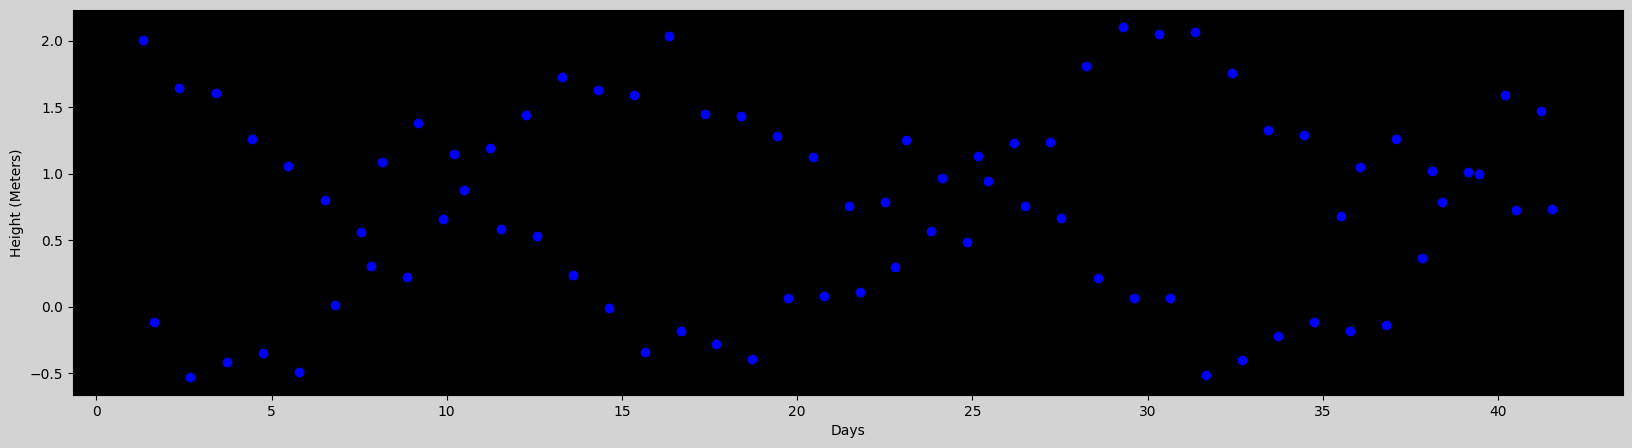

In [7]:
if __name__=="__main__":
    main()